<a href="https://colab.research.google.com/github/anildevireddy/AnilAIML/blob/master/SLF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

ModuleNotFoundError: No module named 'statsmodels'

## Loading the dataset

In [ ]:
# Connect to Google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = '/content/drive/My Drive/Colab Notebooks/'
dataset_file = project_path + 'used_device_data.csv'

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.shape

(3454, 15)

**There are 3454 rows and 15 columns.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**The dataset has 4 columns with object datatype, 9 columns with float datatype and two columns with integer datatype.**


In [ ]:
# read the data
df = pd.read_csv(dataset_file)
# returns the first 5 rows
df1=df.head(5)
df2=df1.append(df.tail(5))
print (df2)

     brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
3449       Asus  Android        15.34  yes   no             NaN   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1                 16.0       128.0  8.0   4300.0   213.0          2020   
2                  8.0       128.0  8.0 

<ipython-input-8-93c387188cfe>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df1.append(df.tail(5))


In [ ]:
# Checking the statistical validity of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


**Checking for duplicate values**

In [ ]:
# Checking for duplicate rows of data and drop if there is any.
df.duplicated(subset=None, keep='first').sum()

0

**No duplicate rows**

**Checking for missing values**

In [ ]:
#Check for null values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**There are missing values in many columns**

In [ ]:
#unique values
df.nunique()

brand_name                 34
os                          4
screen_size               142
4g                          2
5g                          2
main_camera_mp             41
selfie_camera_mp           37
int_memory                 15
ram                        12
battery                   324
weight                    555
release_year                8
days_used                 924
normalized_used_price    3094
normalized_new_price     2988
dtype: int64

There are 34 unique brand names in the dataset.

There are 4 different OS values.

The dataset has devices with different screen sizes.

4g, 5g columns have 'yes' or 'no' values.

The dataset has devices that are released across 8 years as release year column is having 8 unique values.


In [ ]:
#Uique brand names and their counts
df["brand_name"].value_counts().sort_values(ascending=False)

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

Others has most number of devices in the dataset: 502

After that Samsung leads the list (341) followed by Huawei,
LG, Lenovo and ZTE. 

In [ ]:
#Top 5 brands 
df['brand_name'].value_counts().sort_values(ascending=False).head(5)

Others     502
Samsung    341
Huawei     251
LG         201
Lenovo     171
Name: brand_name, dtype: int64

In [ ]:
#Number of 4g devices
df.groupby(['4g'])['4g'].count()

4g
no     1119
yes    2335
Name: 4g, dtype: int64

In [ ]:
#Number of 5g devices
df.groupby(['5g'])['5g'].count()

5g
no     3302
yes     152
Name: 5g, dtype: int64

**There are 2335 4g devices and 152 5g devices.**

In [ ]:
#Device counts by operating system
df.groupby(['os'])['os'].count()

os
Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

**Dataset has more number of Android devices.**

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

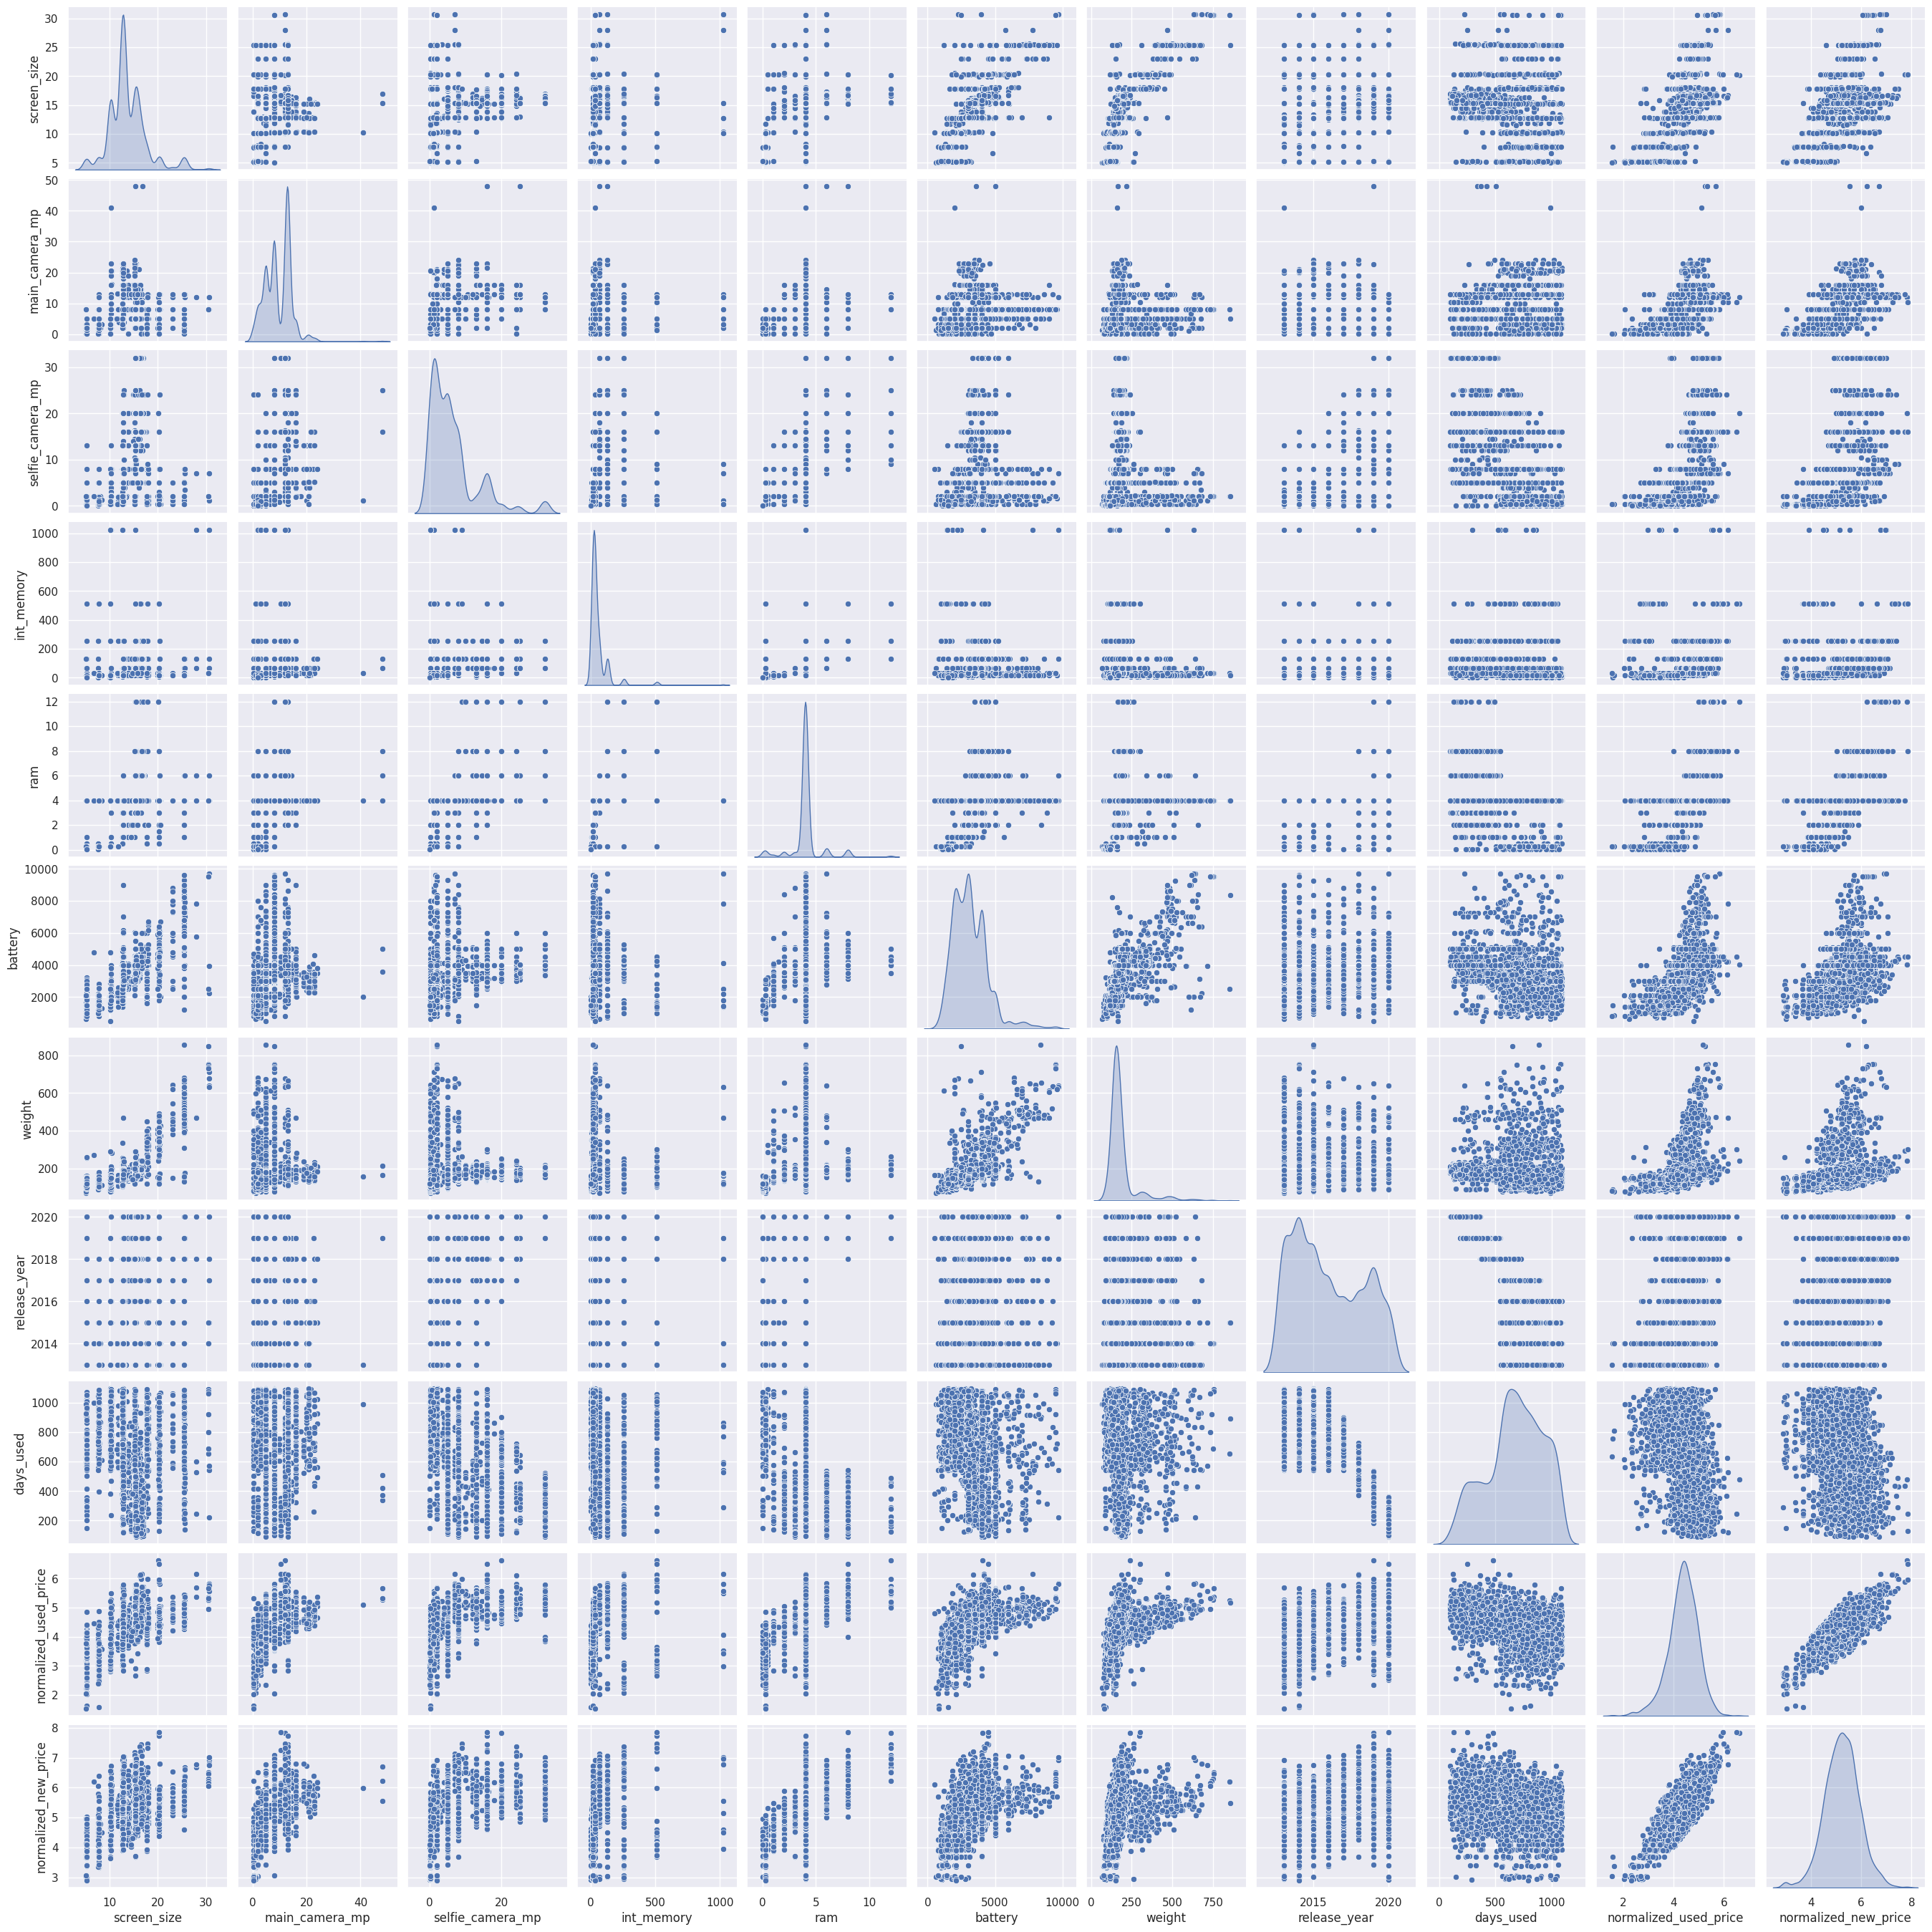

In [ ]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

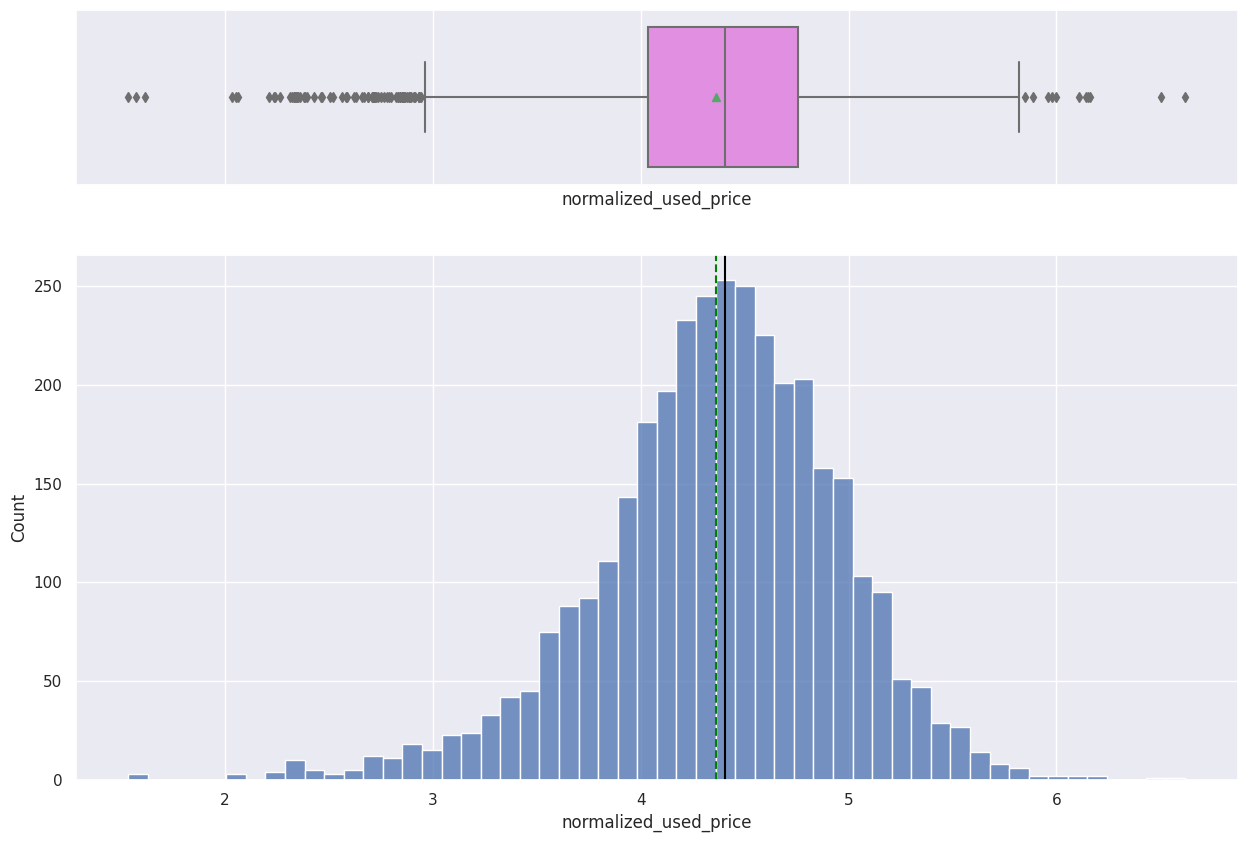

In [ ]:
#Normalized used price study
histogram_boxplot(df,"normalized_used_price")

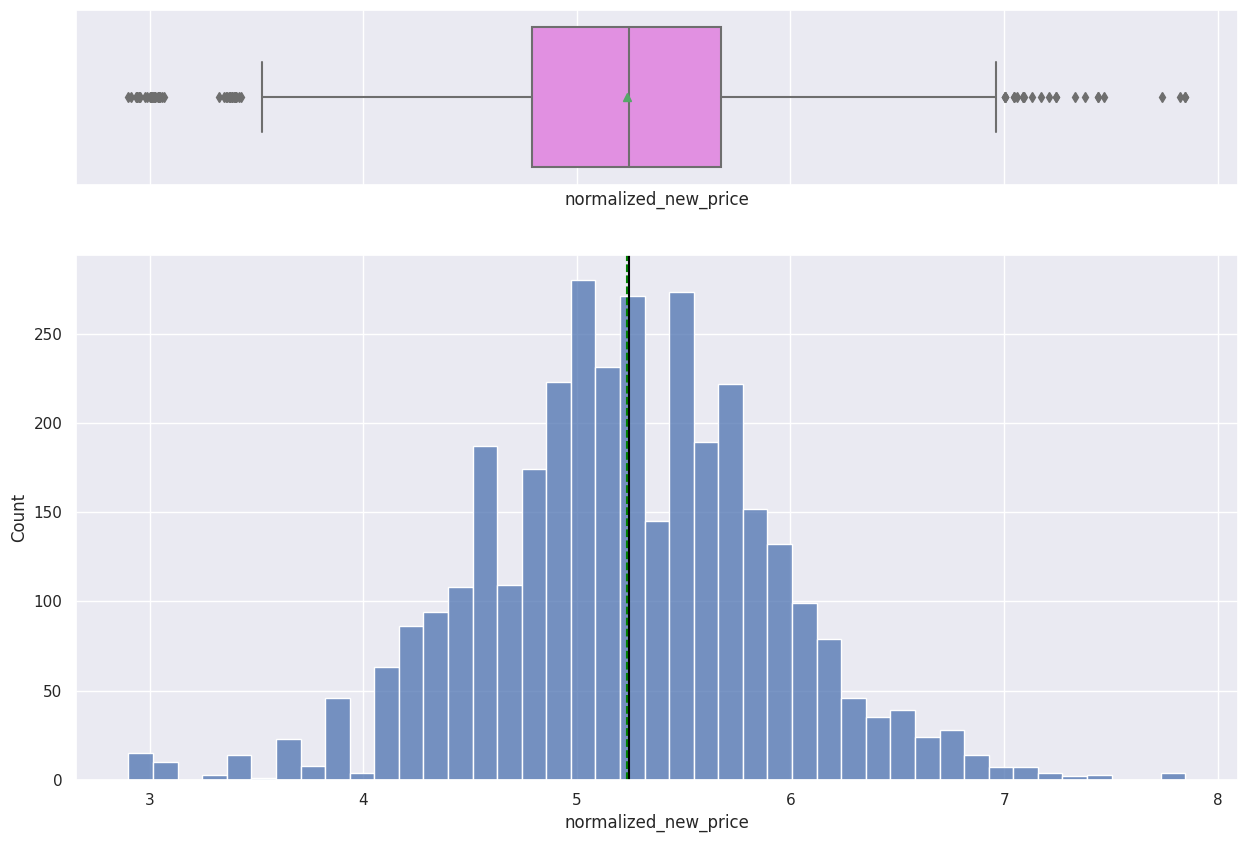

In [ ]:
#Normalized new price study
histogram_boxplot(df,"normalized_new_price")

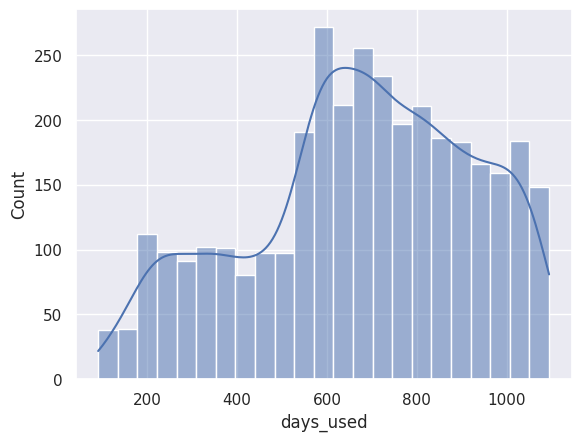

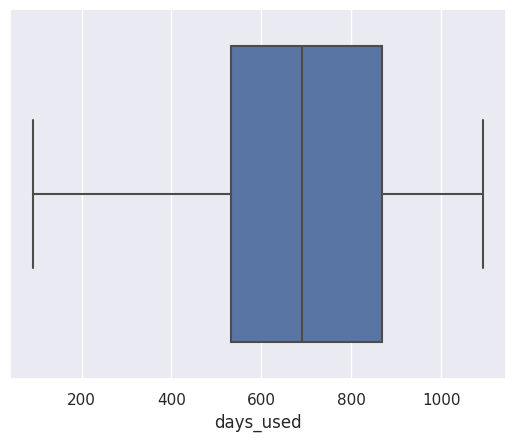

In [ ]:
#Hist plot to understand the behaviour of days_used
sns.histplot(data=df,x='days_used', kde = True)
plt.show()
sns.boxplot(data=df,x='days_used')
plt.show()

**Days user is slightly left skewed.**

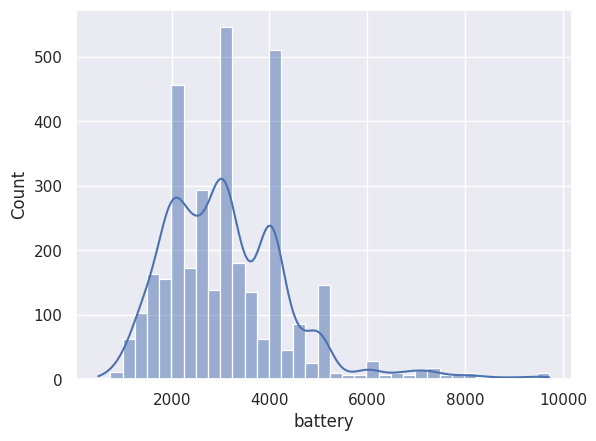

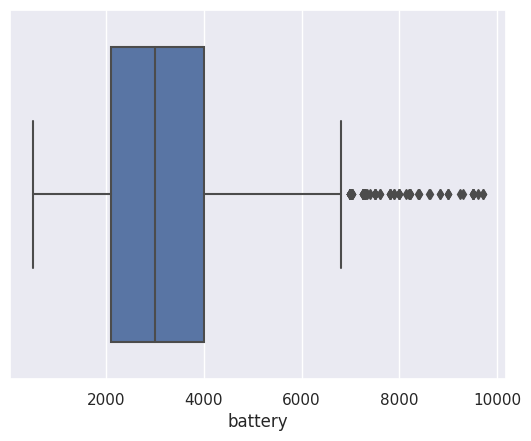

In [ ]:
#Hist plot to understand the behaviour of battery
sns.histplot(data=df,x='battery', kde = True)
plt.show()
sns.boxplot(data=df,x='battery')
plt.show()

**Battery column is right skewed.**

There are many outliers in the battery column.

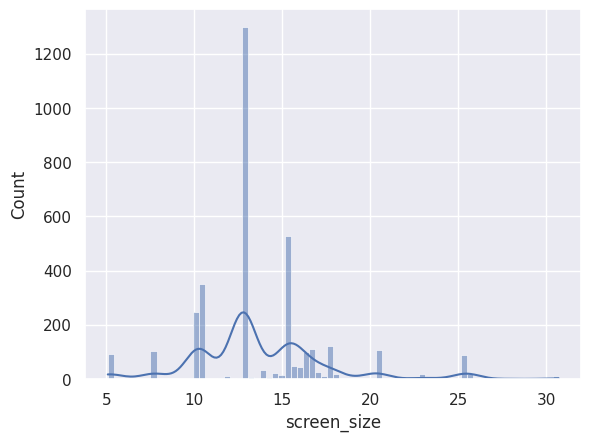

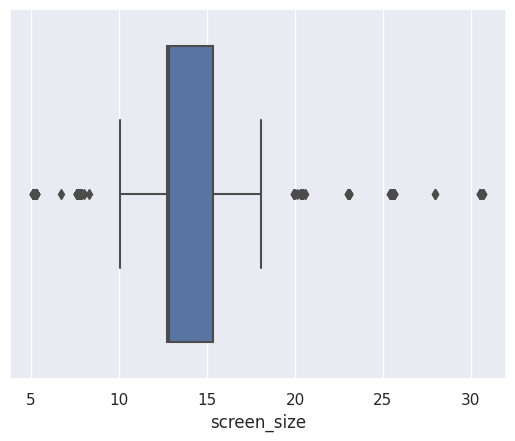

In [ ]:
#Hist plot to understand the behaviour of screen_size
sns.histplot(data=df,x='screen_size', kde = True)
plt.show()
sns.boxplot(data=df,x='screen_size')
plt.show()

Screen size seems to be normally distributed.

**Explore the Categorical variables**

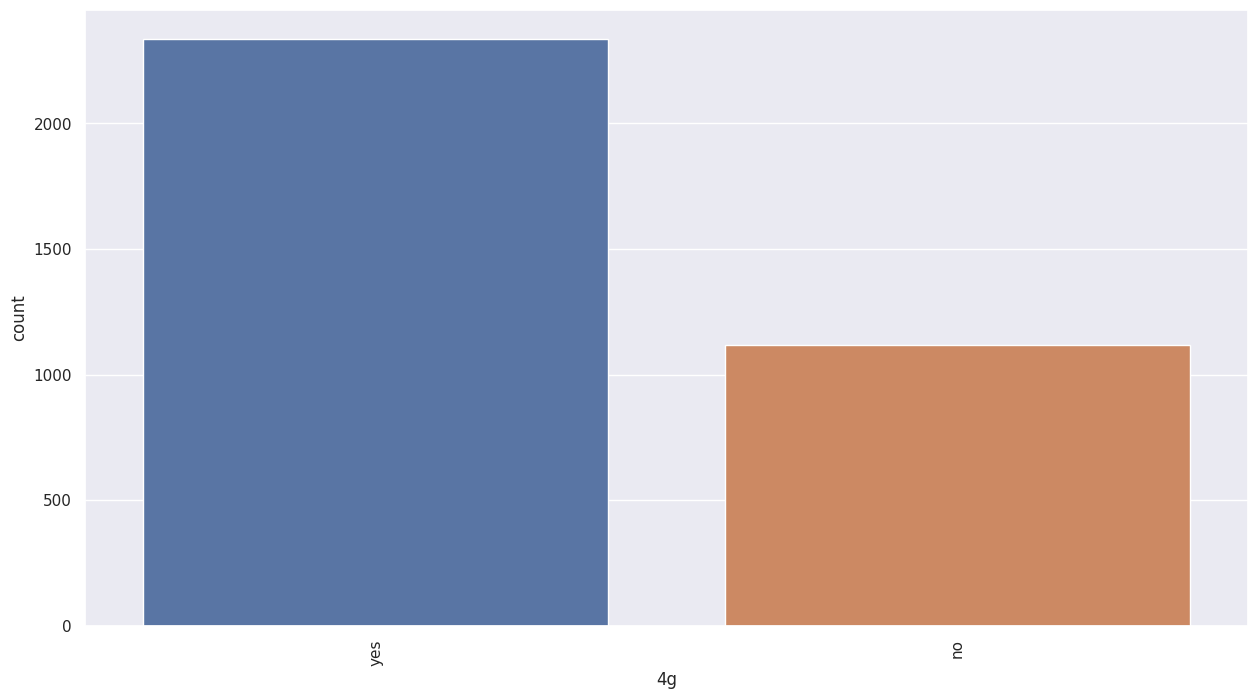

In [ ]:
#Count plot to find the  counts for 4g
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='4g')
plt.xticks(rotation=90);

In [ ]:
df['4g'].value_counts()

yes    2335
no     1119
Name: 4g, dtype: int64

**There are 2335 devices that supports 4g network.**

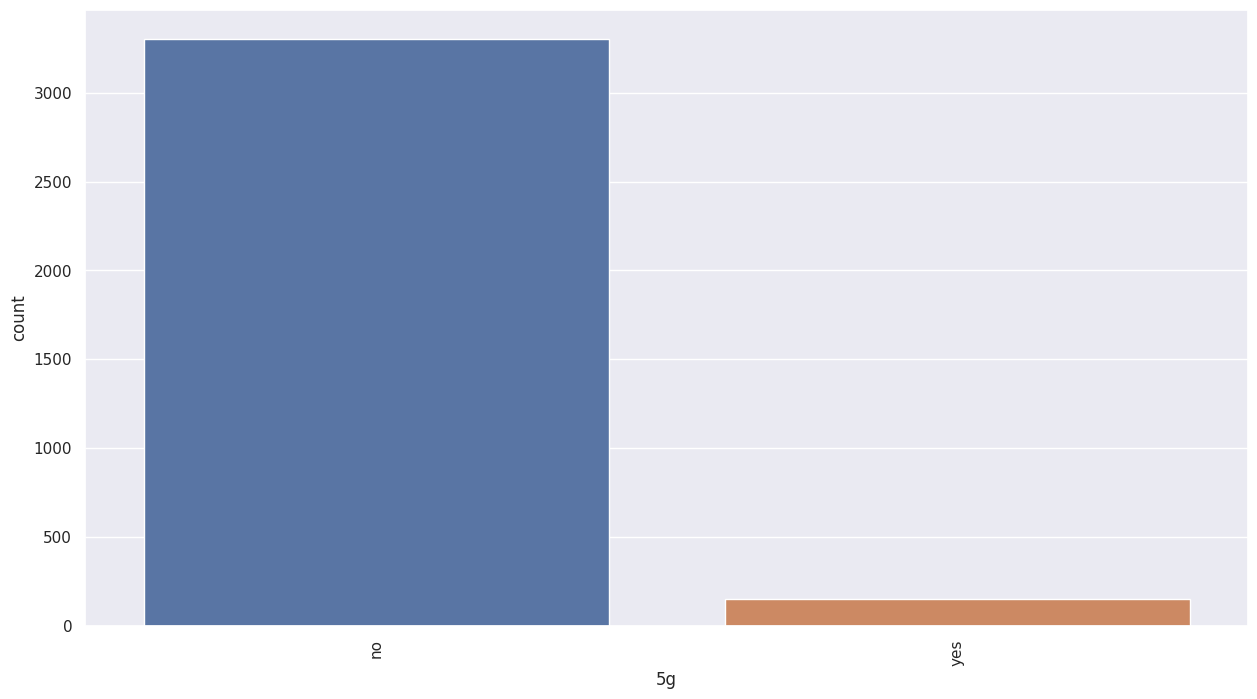

In [ ]:
#Count plot to find the  counts for 5g
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='5g')
plt.xticks(rotation=90);

In [ ]:
df['5g'].value_counts()

no     3302
yes     152
Name: 5g, dtype: int64

**There are only 152 devices in the entire dataset that supports 5g network.**

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# creating a copy of the data so that original data remains unchanged
df1 = df.copy()

In [ ]:
df1.isnull().sum()   #Find the missing values

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
#Handling main camera pixels is missing values
df_mc = df1[df1["main_camera_mp"].isnull()]
df_mc.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297


As per the above sample data, it seems the null values of the main camera can be grouped by brand_name, os and release year.

In [ ]:
#Handling weight missing values
df_sc = df1[df1["weight"].isnull()]
df_sc.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3002,XOLO,Android,12.70,yes,no,13.0,5.0,32.0,4.0,2400.0,NaN,2015,576,4.165890,4.930437
3003,XOLO,Android,12.83,yes,no,8.0,5.0,16.0,4.0,3200.0,NaN,2015,800,4.282068,5.189228
3004,XOLO,Android,12.70,no,no,8.0,2.0,32.0,4.0,2100.0,NaN,2015,878,3.879706,4.081090
3005,XOLO,Android,10.29,no,no,5.0,0.3,32.0,4.0,1800.0,NaN,2015,1036,3.823847,4.396053
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.0,4.0,2500.0,NaN,2015,679,3.837084,4.347176


In [ ]:
#Handling selfie camera missing values
df_sc = df1[df1["selfie_camera_mp"].isnull()]
df_sc.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1080,Google,Android,15.32,yes,no,12.2,NaN,64.0,4.0,3430.0,184.0,2018,475,5.573826,6.865974
1081,Google,Android,12.83,yes,no,12.2,NaN,64.0,4.0,2915.0,148.0,2018,424,4.464988,6.745083


In [ ]:
#Impute the missing values with median values by brand name, os and release year
cols_to_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_to_impute:
    df1[col] = df1.groupby([ "brand_name","release_year","os"])[col].transform(
        lambda x: x.fillna(x.median())
    )

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
#Check for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
#Impute the missing values with median values by brand name
cols_to_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_to_impute:
    df1[col] = df1.groupby([ "brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
#Check for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
#Handling the remaining missing values under main camera
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

In [ ]:
#Check for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

## EDA

- It is a good idea to explore the data once again after manipulating it.

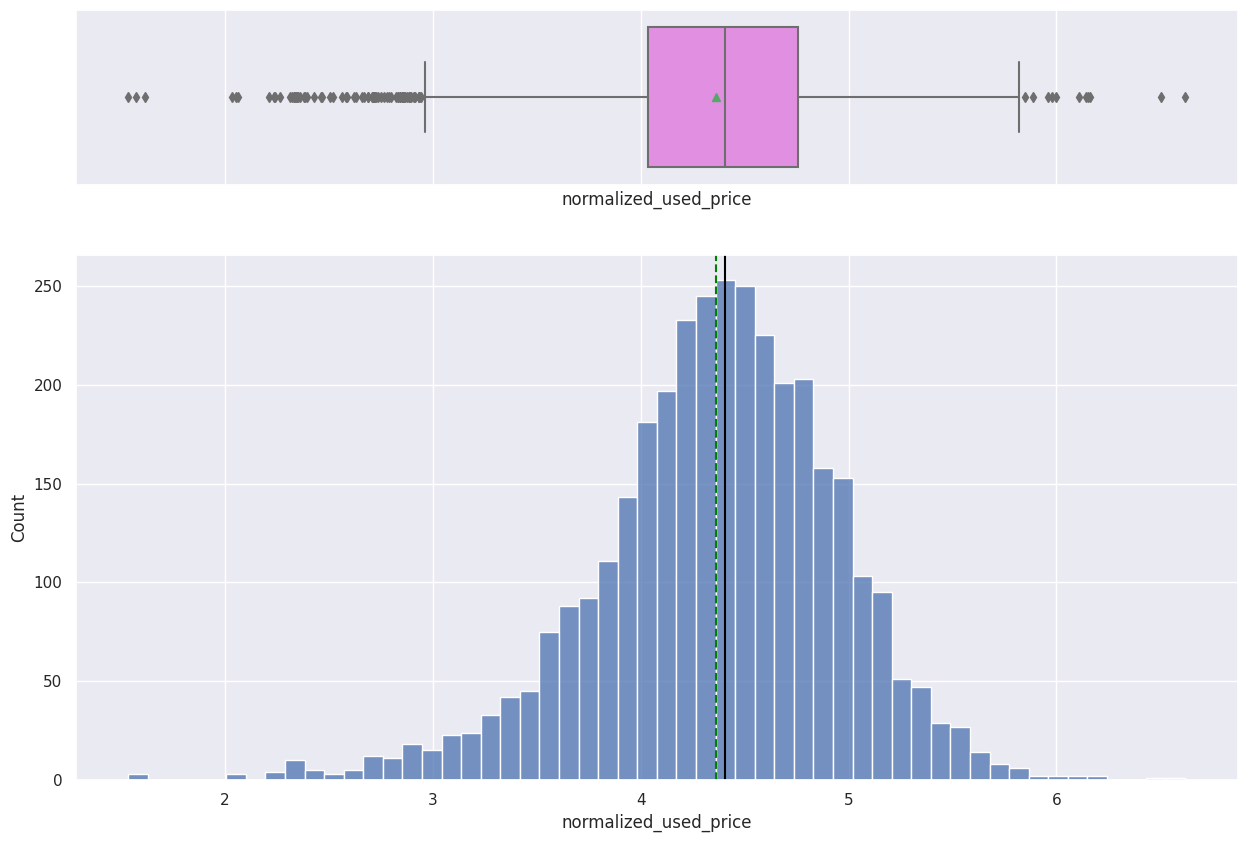

In [ ]:
histogram_boxplot(df1,"normalized_used_price")

**As per the above histogram plot, the used devices price follows a normal distribution**

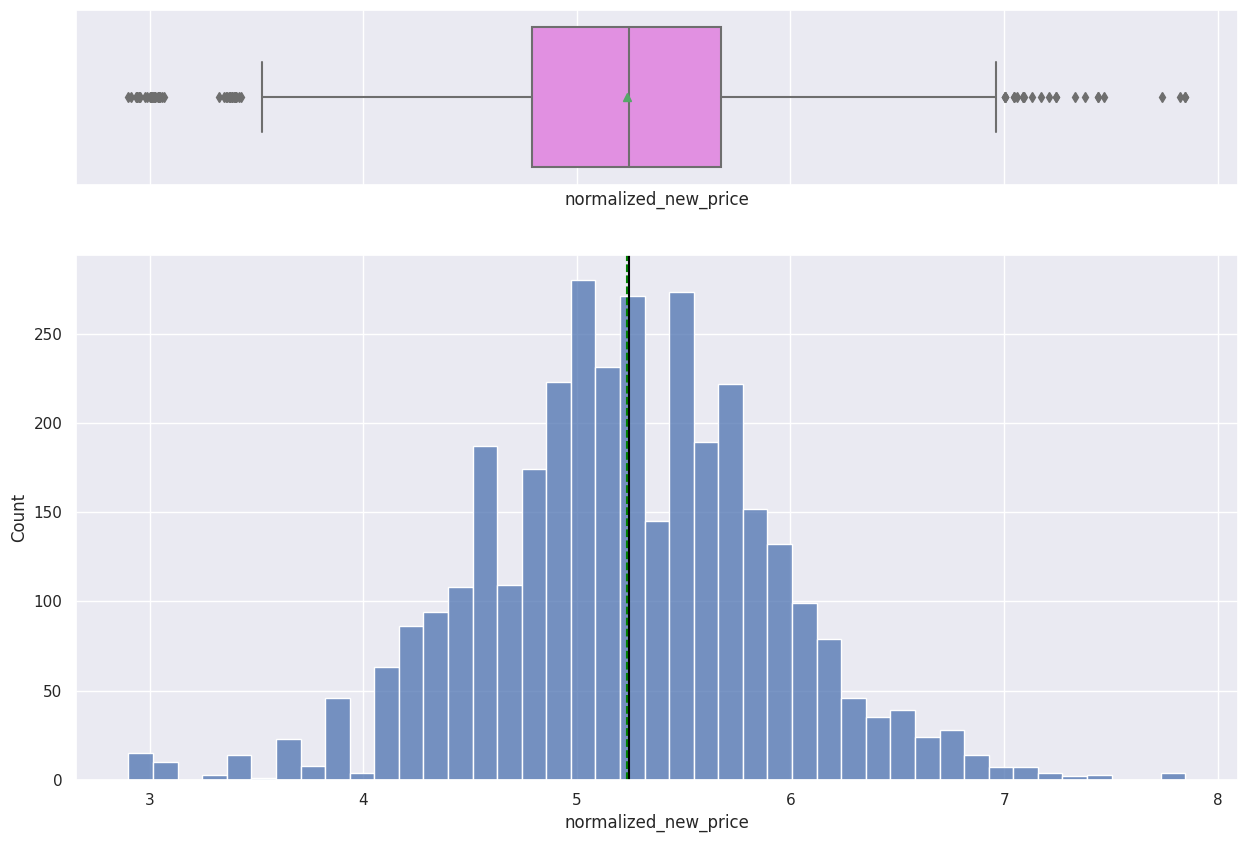

In [ ]:
histogram_boxplot(df1,"normalized_new_price")

**As per the above histogram plot, the normalized new devices price also follows a normal distribution**

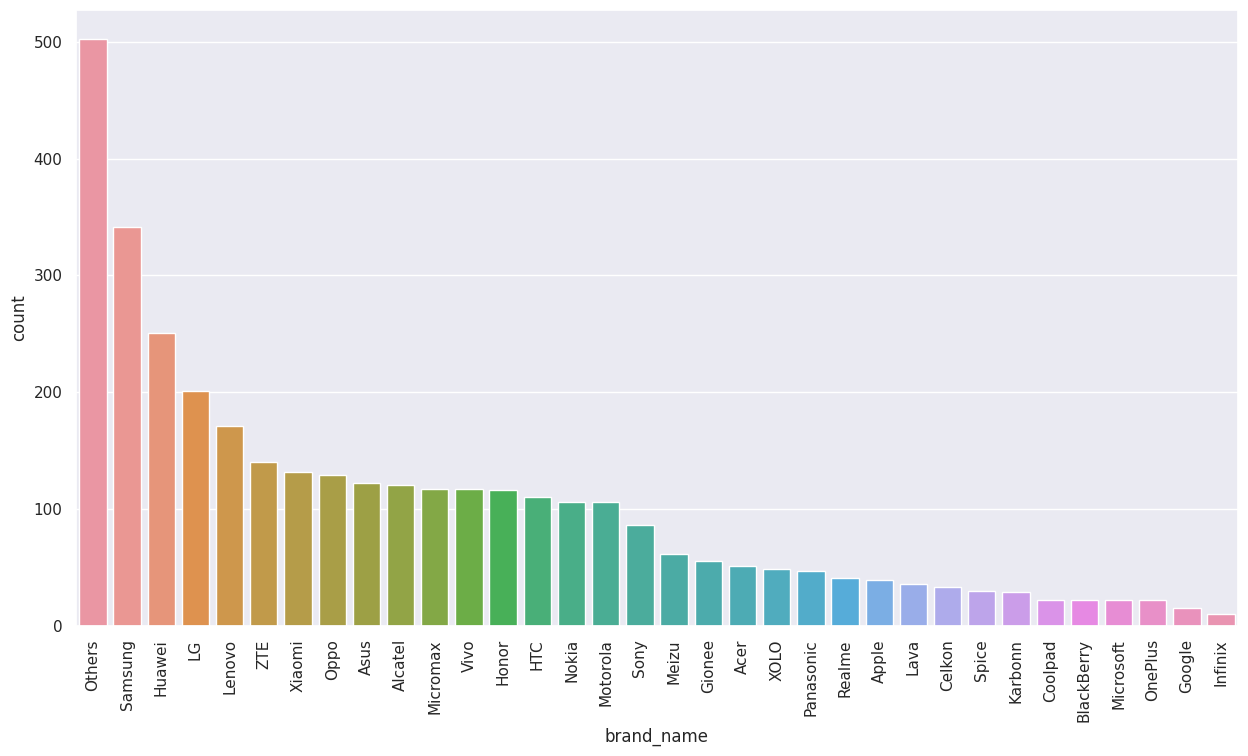

In [ ]:
#Count plot to find the market capture by brand name
plt.figure(figsize=(15,8))
sns.countplot(data=df1, x='brand_name', order=df['brand_name'].value_counts().index);
plt.xticks(rotation=90);

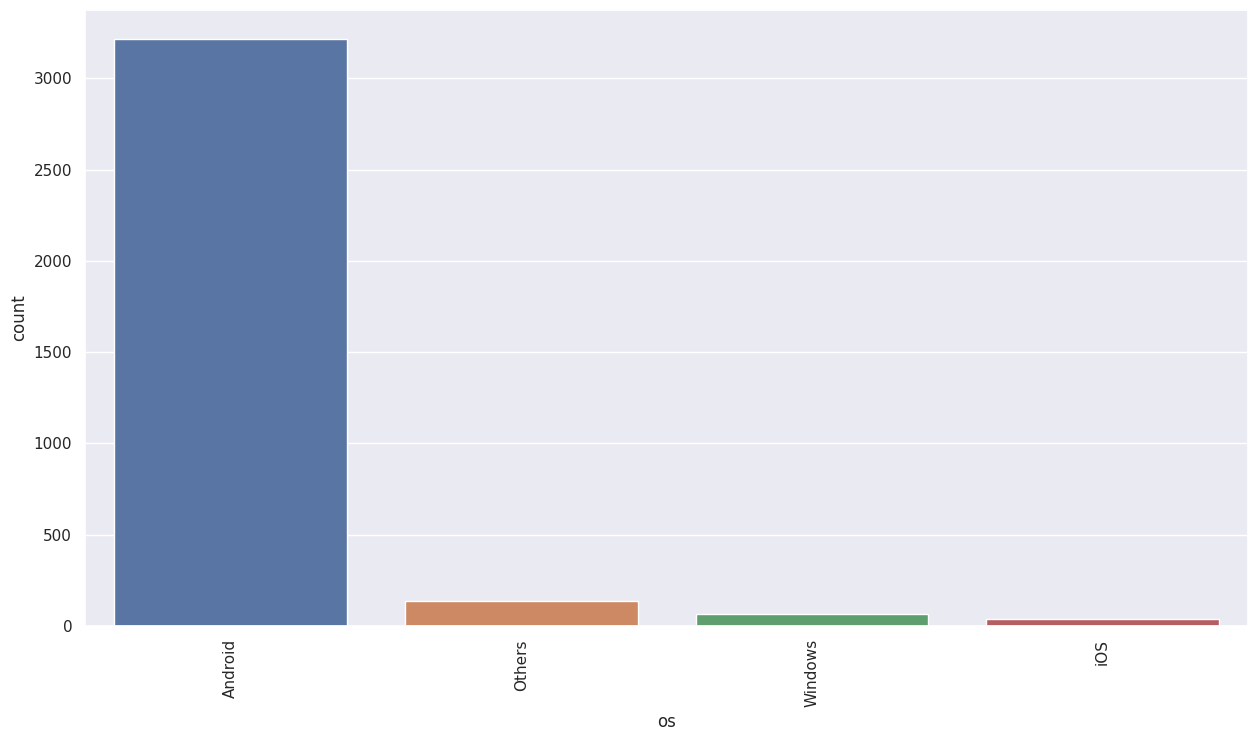

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df1, x='os', order=df['os'].value_counts().index);
plt.xticks(rotation=90);

In [ ]:
# checking the value counts for each unique value in "OS" column
df1["os"].value_counts(normalize=True) * 100

Android    93.051534
Others      3.966416
Windows     1.939780
iOS         1.042270
Name: os, dtype: float64

**Android devices dominates the used device market by capturing 93.05 %**

<Axes: xlabel='release_year', ylabel='count'>

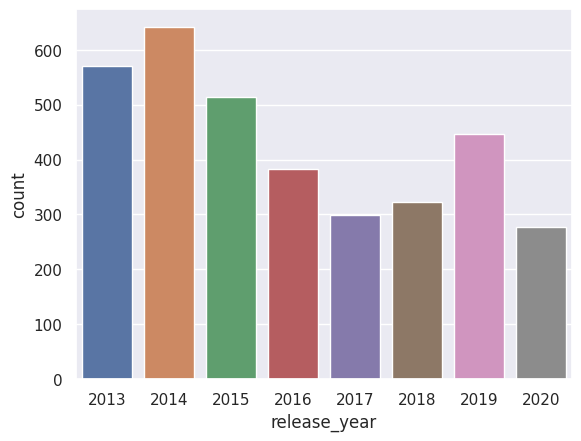

In [ ]:
sns.countplot(data=df1, x="release_year")

<Axes: xlabel='4g', ylabel='count'>

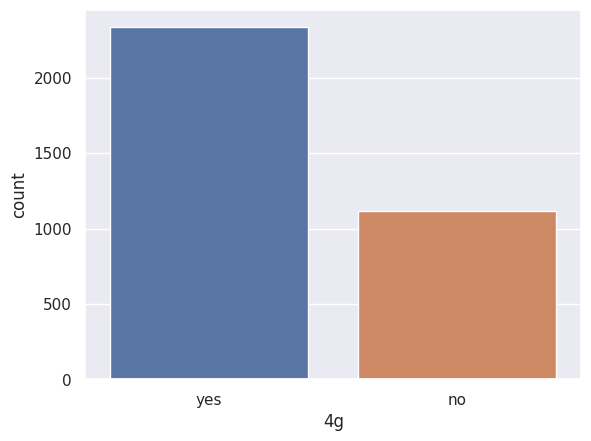

In [ ]:
sns.countplot(data=df1, x="4g")

<Axes: xlabel='5g', ylabel='count'>

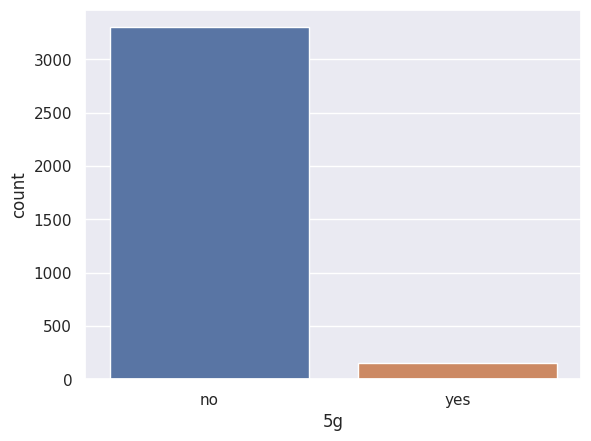

In [ ]:
sns.countplot(data=df1, x="5g")

**Bivariate Analysis**

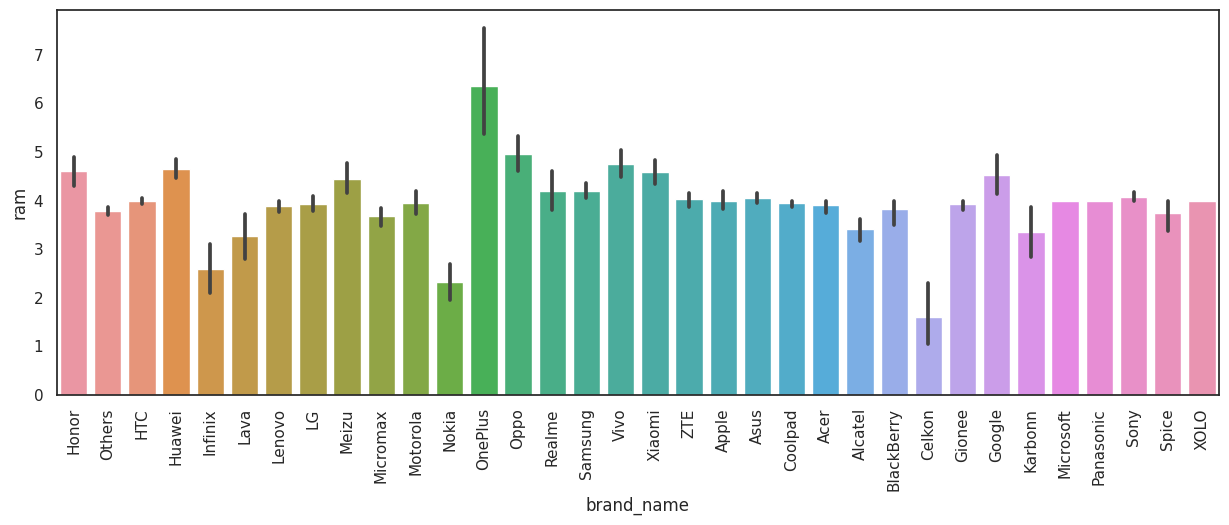

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="brand_name", y="ram", data=df1)
plt.xticks(rotation=90);

**It seems OnePlus brand has more number of devices with higher RAM.**

In [ ]:
df1[df1['battery']>4500].groupby(['brand_name'])['brand_name'].count().sort_values(ascending=False)

brand_name
Samsung      50
Others       41
Huawei       37
Xiaomi       31
Lenovo       28
Asus         22
Apple        17
Honor        14
Motorola     14
Vivo         13
LG           12
Realme       12
ZTE          10
Gionee       10
Acer          7
Infinix       6
Sony          6
Oppo          4
Nokia         1
Panasonic     1
Alcatel       1
Spice         1
HTC           1
Google        1
Micromax      1
Name: brand_name, dtype: int64

In [ ]:
df1[df1['battery']>4500].groupby(['os'])['os'].count().sort_values(ascending=False)

os
Android    324
iOS         14
Others       3
Name: os, dtype: int64

In [ ]:
df_lb = df1[df.battery > 4500]

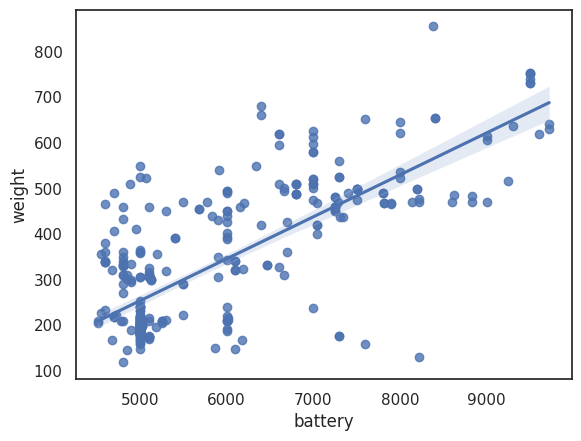

In [ ]:
sns.regplot(x="battery", y ="weight", data=df_lb);

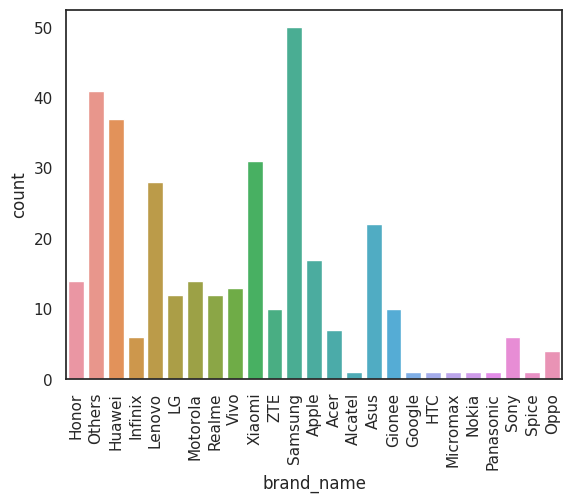

In [ ]:
sns.countplot(data=df_lb, x="brand_name")
plt.xticks(rotation=90);

Samsung has more number of used devices that gives the battery of more than 4500 mAh.

Android devices has more number of used devices with the  larger battery.

Larger battery devices weighs more than the smaller battery energy.

In [ ]:
df_sz = df1[df1.screen_size > 6]

In [ ]:
df_sz.shape

(3362, 15)

**Number of Devices with screen size greater than 6 inches: 3362**

In [ ]:
df_sz["brand_name"].value_counts().head()

Others     479
Samsung    334
Huawei     251
LG         197
Lenovo     171
Name: brand_name, dtype: int64

**The above list shows the top 5 brands with more number of devices with screen size > 6 inches.**

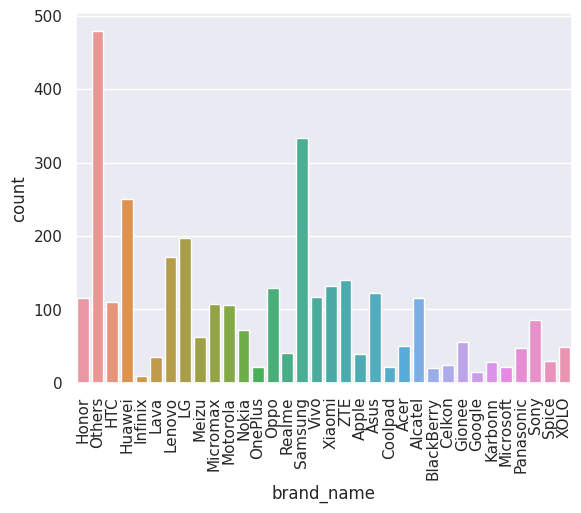

In [ ]:
sns.countplot(data=df_sz, x="brand_name" )
plt.xticks(rotation=90);

In [ ]:
df_sc = df1[df1.selfie_camera_mp > 8]
df_sc.shape

(655, 15)

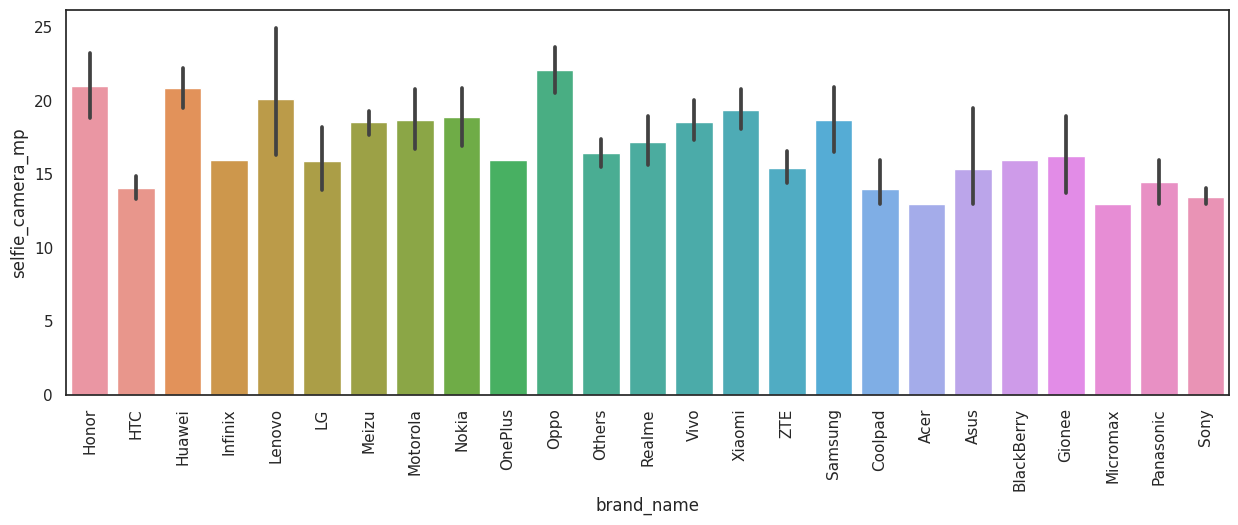

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="brand_name", y="selfie_camera_mp", data=df_sc)
plt.xticks(rotation=90);

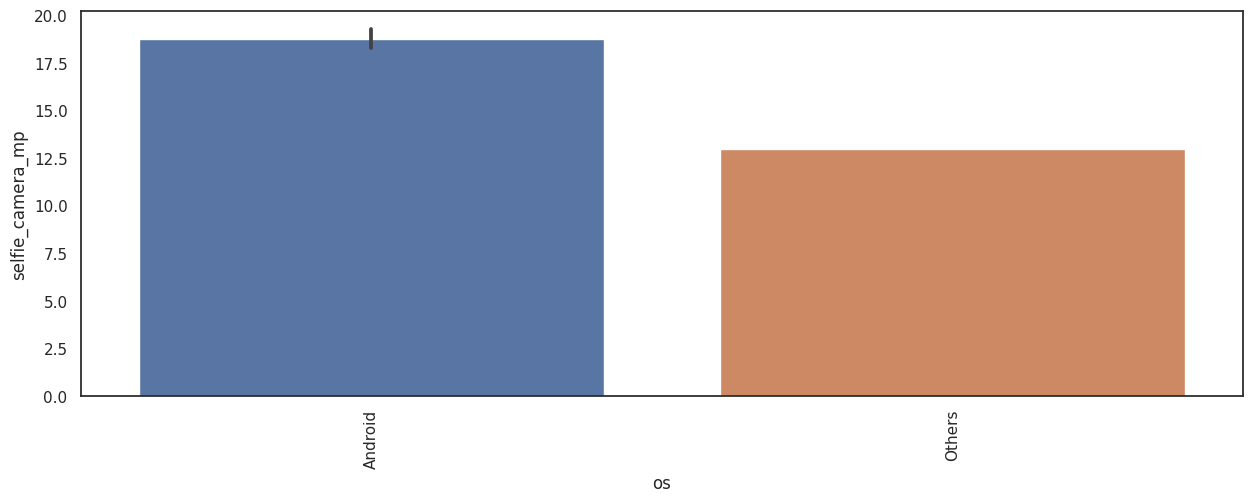

In [ ]:
#selfie camera vs os
plt.figure(figsize=(15, 5))
sns.barplot(x="os", y="selfie_camera_mp", data=df_sc)
plt.xticks(rotation=90);

In [ ]:
df_sc.groupby(['os'])['os'].count().sort_values(ascending=False)

os
Android    653
Others       2
Name: os, dtype: int64

In [ ]:
df_sc.groupby(['brand_name'])['brand_name'].count().sort_values(ascending=False)

brand_name
Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
ZTE           20
HTC           20
OnePlus       18
Realme        18
Sony          14
Lenovo        14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
Micromax       2
Panasonic      2
BlackBerry     2
Acer           1
Name: brand_name, dtype: int64

**Android offers greatest number of devices with slefie camera pixels > 8**

**ios doesn't offer any device with selfie camera pixels > 8**

**Huawei offers more number of used devices with selfie camera pixels > 8**

**Normalized user price correlations with other attributes**

<ipython-input-99-70363edf6492>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = abs(df1.corr())                   # correlation matrix


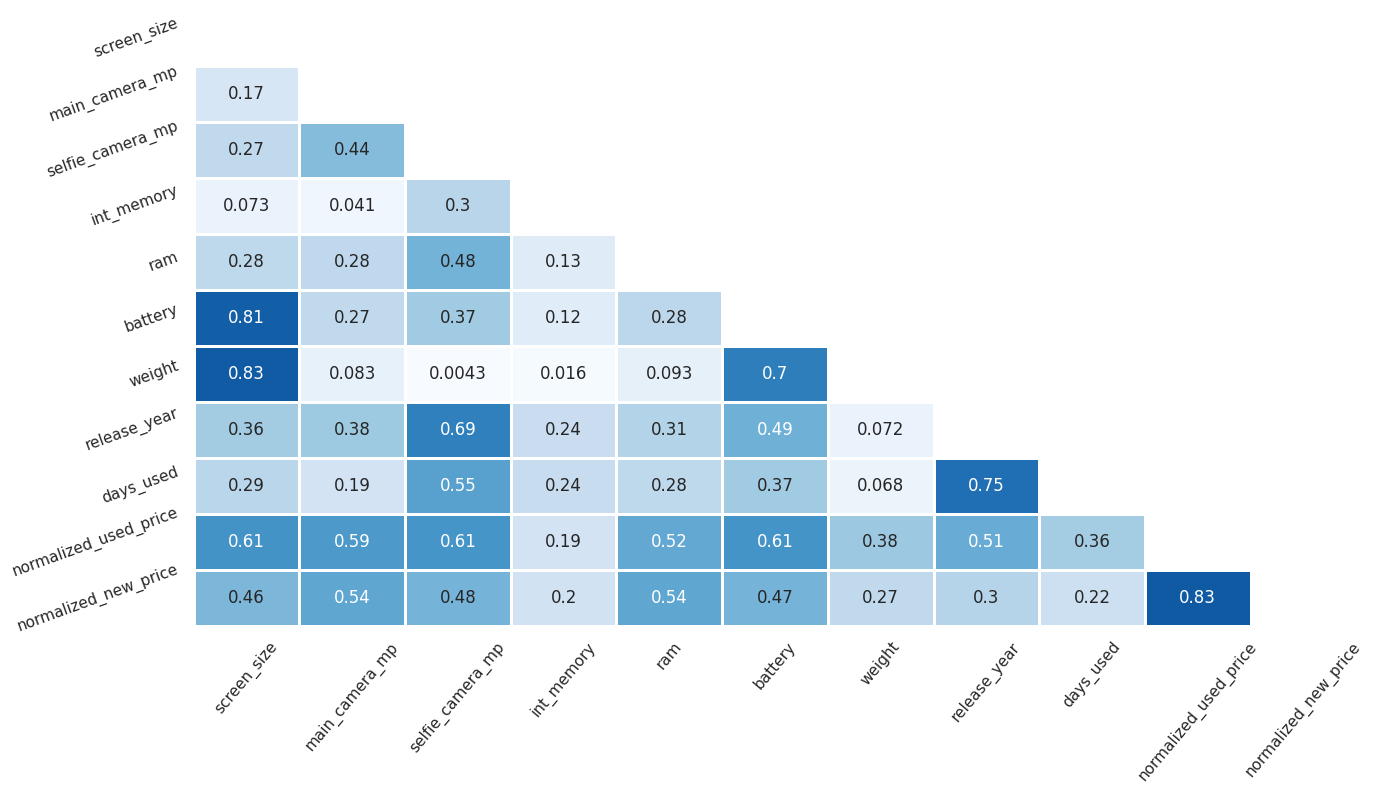

In [ ]:
corr = abs(df1.corr())                   # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0              # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))            # setting the figure size
sns.set_style(style = 'white')          # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)               # Aesthetic purposes
plt.yticks(rotation = 20)               # Aesthetic purposes
plt.show()

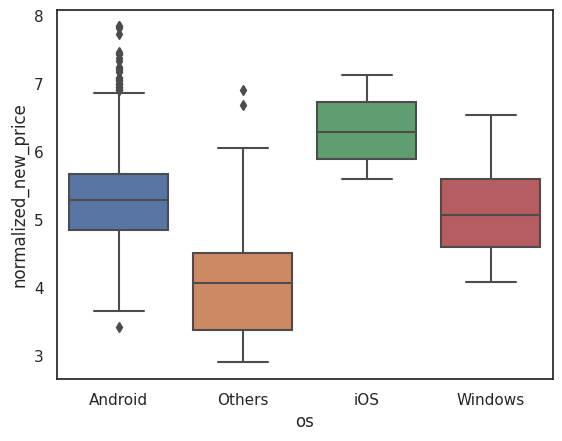

In [ ]:
#box plot to understand the behaviour of normalized user price
sns.boxplot(x="os", y="normalized_user_price", data=df1);

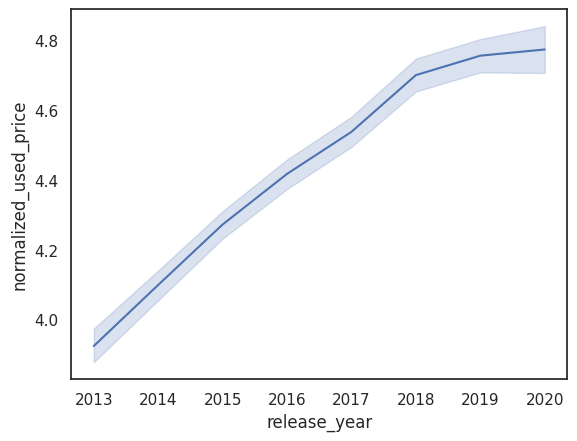

In [ ]:
sns.lineplot(x="release_year", y="normalized_used_price", data=df1);

**normalized_new_price and normalized_used_price also show high correlation**

**There is a negative correlation between days_used and normalized_used_price**

**Normalized used price is higher for iOS devices**

**The price of used devices increasing with release years**

**Outlier detection**

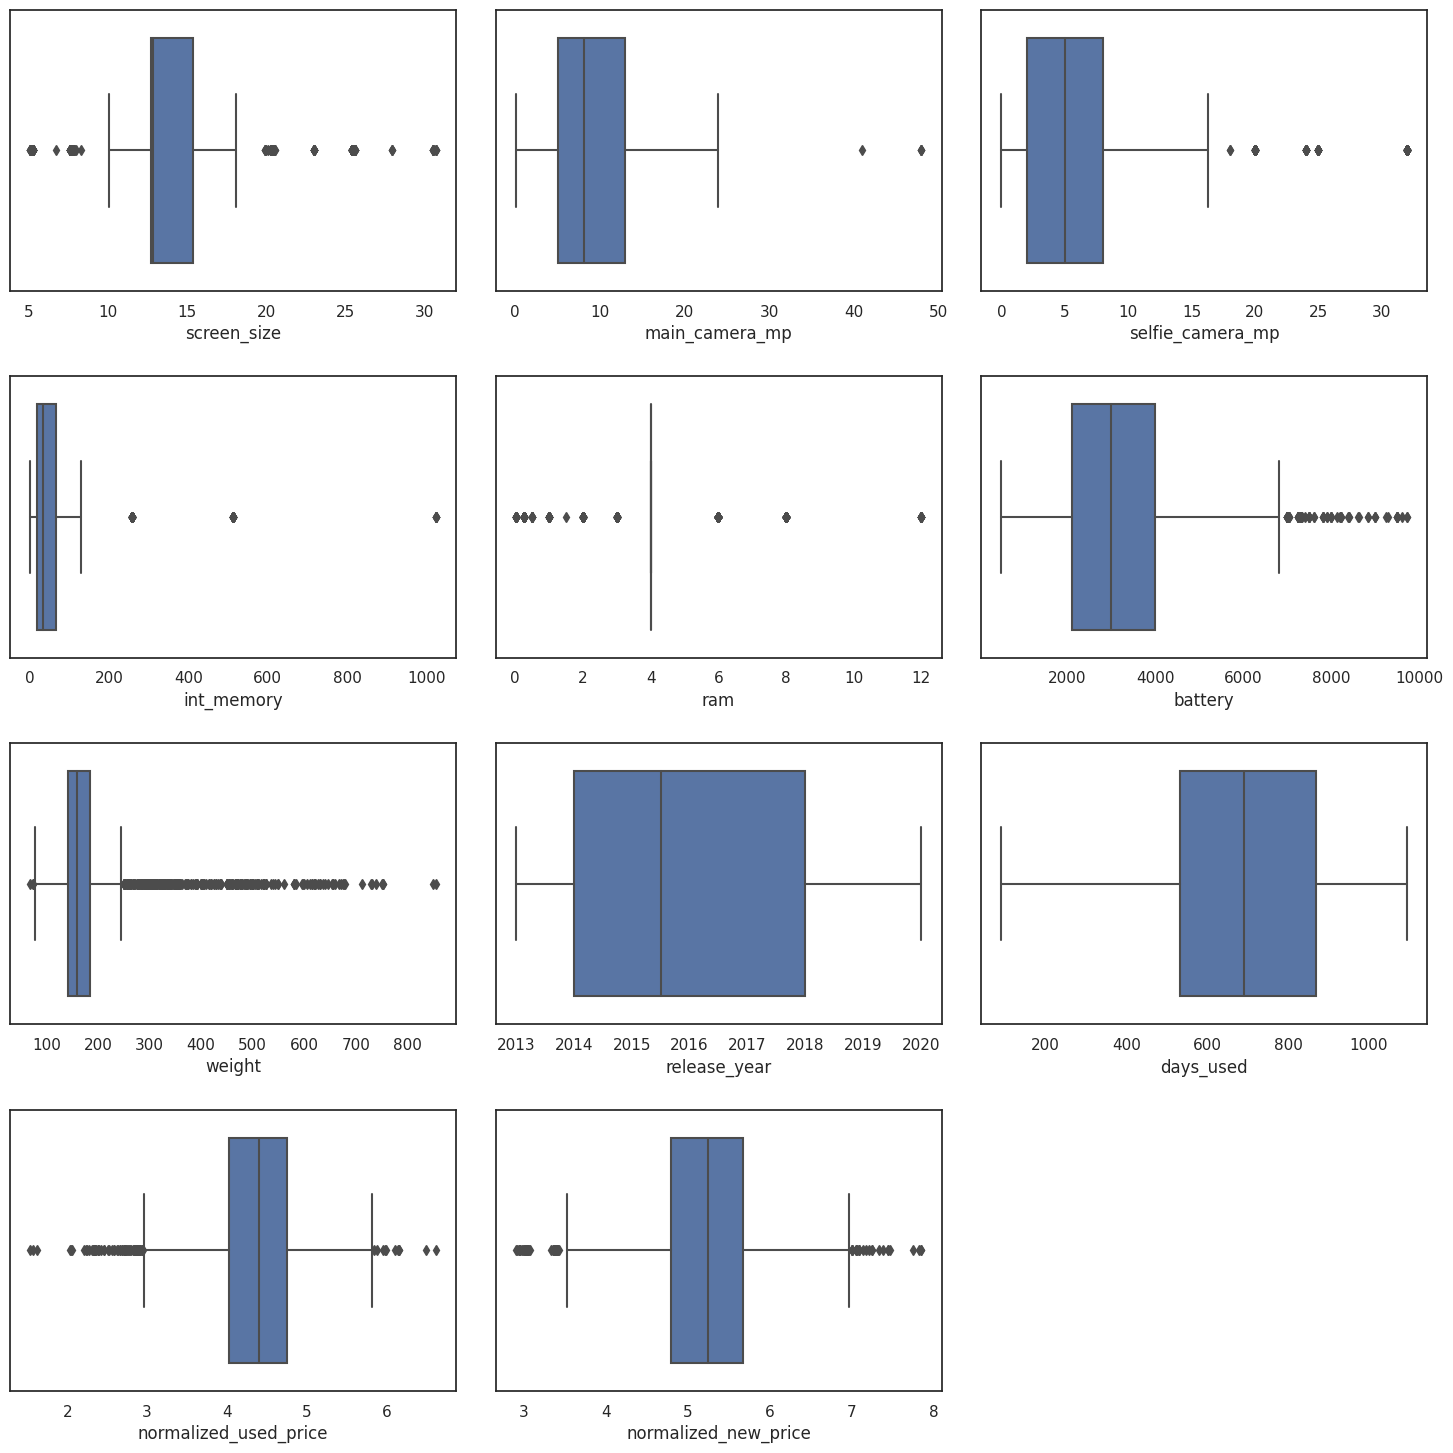

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

As per the above box plots, we can exclude ram column from treating the outliers

In [ ]:
# list of columns to treat for outliers
treat_outlier_cols = ["screen_size", "selfie_camera_mp","int_memory","battery", "weight", "normalized_used_price","normalized_new_price"] 

In [ ]:

def treat_outliers(df, col_list):
    for col in col_list:
        df = treat_outlier_column(df, col)

    return df

In [ ]:

def treat_outlier_column(df, col):
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


In [ ]:
# create a new data frame after treating outliers in the colums
df2 = treat_outliers(df1, treat_outlier_cols)
#df2 = treat_outlier_column(df1,"normalized_new_price")

## Model Building - Linear Regression

In [ ]:
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.623677,4.750414,0.08,5.0,8.1,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.675573,39.093564,0.01,16.0,32.0,64.0,136.0
ram,3454.0,NaN,NaN,NaN,4.031471,1.371136,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3108.637666,1213.370102,500.0,2100.0,3000.0,4000.0,6850.0


In [ ]:
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,249.5,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
df2.dtypes

brand_name                object
os                        object
screen_size              float64
4g                        object
5g                        object
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
dtype: object

In [ ]:
df2["brand_name"].nunique()

34

In [ ]:
df2.drop(["brand_name"], axis=1, inplace=True) # drop brand_name column as it creates more columns when we create dummys
df2.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,249.5,2020,345,5.135387,5.630961
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
# Separating dependent and independent variables
X = df2.drop('normalized_used_price',axis=1)
y = df2['normalized_used_price']

In [ ]:
# this adds the constant term to the dataset
X = sm.add_constant(X)

In [ ]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020.0,127.0,4.715100,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020.0,325.0,5.519018,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020.0,162.0,5.884631,0.0,0.0,0.0,1.0,1.0
3,1.0,19.30,13.0,8.0,64.0,6.0,6850.0,249.5,2020.0,345.0,5.630961,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020.0,293.0,4.947837,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=7)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


**Make the linear model using statsmodels OLS and print the model summary.**

In [ ]:
# fitting a linear model
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.849
Model:                               OLS   Adj. R-squared:                  0.848
Method:                    Least Squares   F-statistic:                     898.4
Date:                   Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                           05:19:12   Log-Likelihood:                 211.84
No. Observations:                   2417   AIC:                            -391.7
Df Residuals:                       2401   BIC:                            -299.0
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Adjusted R-Squared is  0.848, which is good**

The coefficient of normalized_new_price is equal to **0.4075**

In [ ]:
print("The coefficient of determination (R-squared) is ", olsmodel.rsquared)

The coefficient of determination (R-squared) is  0.8487728965748056


In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
2987,3.958907,3.918649,0.040258
1720,3.637060,3.805057,-0.167997
945,3.537184,3.766851,-0.229667
3104,4.269837,4.291035,-0.021198
72,4.423648,4.819532,-0.395884


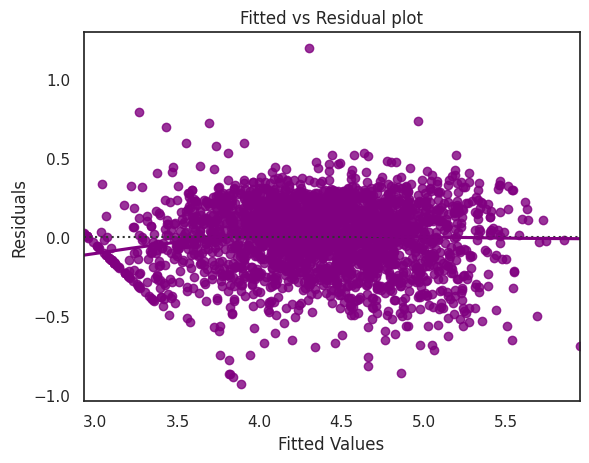

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

*   We see no pattern in the plot above.
*   Hence, the assumptions of linearity and independence are satisfied.




## Model Performance Check

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.221666,0.175571,0.848773,0.847765,4.121473


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231182,0.180296,0.820335,0.817517,4.202723


The train and test data of RMSE & MAE are comparable, so model is not overfitting.

The model is not underfitting as the R-squared value is 0.84 & 0.82

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**Checking Linear Regression Assumptions**

We will be checking the following Linear Regression assumptions:

No Multicollinearity

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

**TEST FOR MULTICOLLINEARITY**

**We will test for multicollinearity using VIF.**

**General Rule of thumb:**

1.   If VIF is 1 then there is no correlation between the kth predictor and the remaining predictor variables.
2.   If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
3.   If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.






In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,3.857707e+06
1,screen_size,5.001238e+00
2,main_camera_mp,1.985593e+00
3,selfie_camera_mp,3.687348e+00
4,int_memory,2.016500e+00
5,ram,2.041907e+00
6,battery,3.750167e+00
7,weight,4.188684e+00
8,release_year,5.002001e+00
9,days_used,2.468180e+00


**Removing Multicollinearity**

To remove multicollinearity

 

1.   Drop every column one by one that has a VIF score greater than 5.
2.   Look at the adjusted R-squared and RMSE of all these models.
3.   Drop the variable that makes the least change in adjusted R-squared.
4.   Check the VIF scores again.
5.   Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["screen_size", "release_year"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,release_year,0.847121,0.222919
1,screen_size,0.840487,0.227705


In [ ]:
col_to_drop = "years_since_release"
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_since_release


,feature,VIF
0,const,3.857707e+06
1,screen_size,5.001238e+00
2,main_camera_mp,1.985593e+00
3,selfie_camera_mp,3.687348e+00
4,int_memory,2.016500e+00
5,ram,2.041907e+00
6,battery,3.750167e+00
7,weight,4.188684e+00
8,release_year,5.002001e+00
9,days_used,2.468180e+00


**Dropping years_since_release has brought the VIF of screen_size below 5.**

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.849
Model:                               OLS   Adj. R-squared:                  0.848
Method:                    Least Squares   F-statistic:                     898.4
Date:                   Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                           05:38:20   Log-Likelihood:                 211.84
No. Observations:                   2417   AIC:                            -391.7
Df Residuals:                       2401   BIC:                            -299.0
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'weight', 'release_year', 'normalized_new_price', '4g_yes', '5g_yes']


In [ ]:
X_train3 = x_train2[selected_features]
X_test3 = x_test2[selected_features]

In [ ]:
olsmodel2 = sm.OLS(y_train, X_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.848
Model:                               OLS   Adj. R-squared:                  0.848
Method:                    Least Squares   F-statistic:                     1346.
Date:                   Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                           05:38:42   Log-Likelihood:                 208.50
No. Observations:                   2417   AIC:                            -395.0
Df Residuals:                       2406   BIC:                            -331.3
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
2987,3.958907,3.918601,0.040305
1720,3.637060,3.817423,-0.180364
945,3.537184,3.773780,-0.236596
3104,4.269837,4.281092,-0.011254
72,4.423648,4.815232,-0.391584


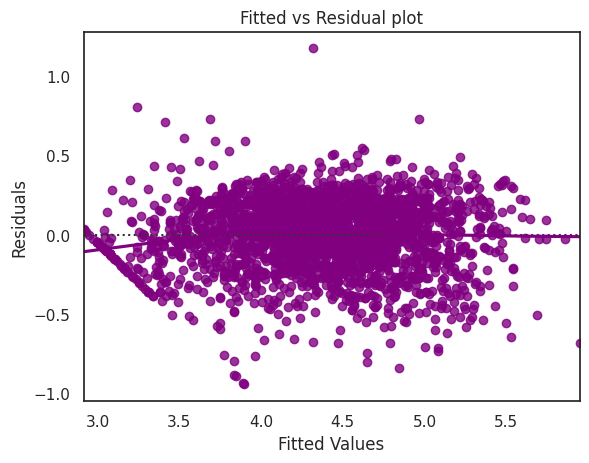

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

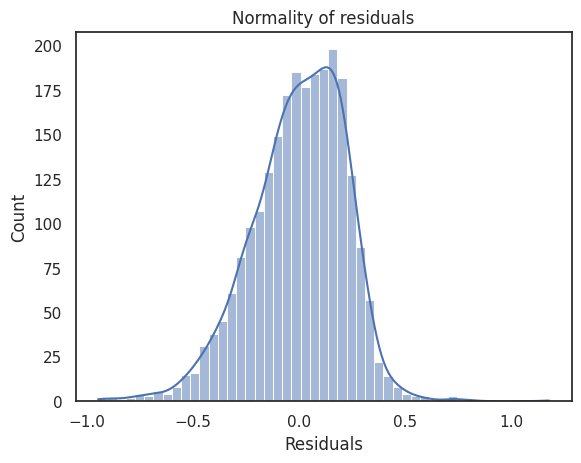

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

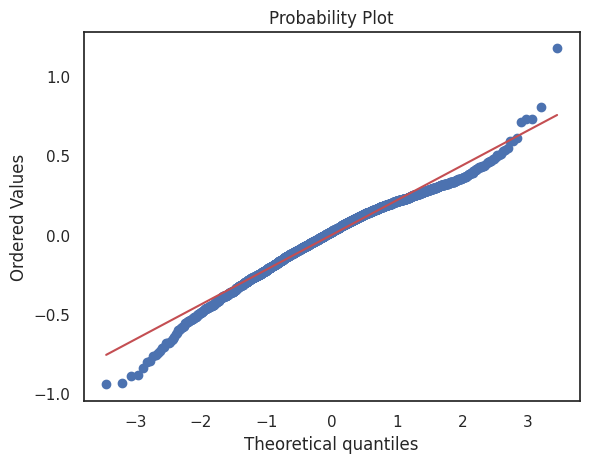

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9807331562042236, pvalue=1.40157549165434e-17)

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.0130544439409315), ('p-value', 0.411233569435074)]

**We can say that the residuals are homoscedastic as p value > 0.05.**

## Final Model

In [ ]:
olsmodel_final = sm.OLS(y_train, X_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.848
Model:                               OLS   Adj. R-squared:                  0.848
Method:                    Least Squares   F-statistic:                     1346.
Date:                   Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                           05:41:34   Log-Likelihood:                 208.50
No. Observations:                   2417   AIC:                            -395.0
Df Residuals:                       2406   BIC:                            -331.3
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#model performance on training data
print("Training Performance\n")
olsmod_final_train_perf = model_performance_regression(olsmodel_final, X_train3, y_train)
olsmod_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.221972,0.175479,0.848355,0.847661,4.118148


In [ ]:
# model performance on test dataset
print("Test Performance\n")
olsmod_final_test_perf = model_performance_regression(olsmodel_final, X_test3, y_test)
olsmod_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232016,0.180887,0.819037,0.817095,4.216203


**The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.**

**olsmodel_final is good for prediction as well as inference purposes.**

## Actionable Insights and Recommendations 

**normalized_new_price has a strong positive correlation with used price.**

 **The higher the price of the new device the higher the price of the same device in refurbished market.**

 **Operating systems of devices other than Android, iOS, and windows have negative coefficients. Hence as they increase, the price of used devices decrease.**

**It seems the consumers are not worried about the price and number of days used, retailers doesn't need to worry about those factors. If the device is having good features and in working condition, consumer will buy them and the market demand is raising for the used devices.**

___